# Algorithm

## Sorting

In [11]:
lst = [50,30,1,6,40,20,77,100,88,4,16,41]

### Selection Sort

In [21]:
def selection_sort(lst):
    if not lst:
        return []
    for i in range(len(lst) - 1):
        smallest = i
        for j in range(i, len(lst)):
            if lst[j] < lst[smallest]:
                smallest = j
        lst[i], lst[smallest] = lst[smallest], lst[i]
    return lst


In [22]:
selection_sort(lst)

[1, 4, 6, 16, 20, 30, 40, 41, 50, 77, 88, 100]

### Bubble Sort

In [23]:
def bubble_sort(lst):
    if lst == []:
        return []
    for i in range(len(lst)):
        for j in range(1, len(lst) - i):
            if lst[j-1] > lst[j]:
                lst[j-1], lst[j] = lst[j], lst[j-1]
    return lst

In [24]:
bubble_sort(lst)

[1, 4, 6, 16, 20, 30, 40, 41, 50, 77, 88, 100]

### Insertion Sort

In [25]:
def insertion_sort(lst):
    if not lst:
        return []
    for i in range(1,len(lst)):
        j = i
        while j > 0 and lst[j] < lst[j-1]:
            lst[j],lst[j-1] = lst[j-1],lst[j]
            j -= 1
            
    return lst

In [26]:
insertion_sort(lst)

[1, 4, 6, 16, 20, 30, 40, 41, 50, 77, 88, 100]

### Shell Sort

In [27]:
import math
def shell_sort(lst):
    if not lst:
        return []
    h = math.ceil(len(lst)/3)
    while h >= 1:
        for i in range(h, len(lst)):
            j = i
            while j >= h and lst[j] < lst[j-h]:
                lst[j], lst[j-h] = lst[j-h], lst[j]
                j -= h
        h -= 1
    
    return lst

In [28]:
shell_sort(lst)

[1, 4, 6, 16, 20, 30, 40, 41, 50, 77, 88, 100]

### Merge Sort

In [29]:
def merge_sort(lst):
    if not lst:
        return []
    if len(lst) == 1:
        return lst
    mid = len(lst) // 2
    left = merge_sort(lst[:mid])
    right = merge_sort(lst[mid:])
    return merge(left, right)

def merge(left, right):
    l, r, res = 0, 0, []
    while l < len(left) and r < len(right):
        if left[l] < right[r]:
            res.append(left[l])
            l += 1
        else:
            res.append(right[r])
            r += 1
    return res + left[l:] + right[r:]

In [30]:
merge_sort(lst)

[1, 4, 6, 16, 20, 30, 40, 41, 50, 77, 88, 100]

### Quick Sort

In [12]:
import random
def quick_sort(lst):
    if not lst:
        return []
    random.shuffle(lst)
    pivot = lst[0]
    left = quick_sort([x for x in lst[1:] if x <= pivot])
    right = quick_sort([x for x in lst[1:] if x > pivot])
    return left + [pivot] + right

In [42]:
quick_sort(lst)

[1, 4, 6, 16, 20, 30, 40, 41, 50, 77, 88, 100]

### Heap Sort

In [49]:
def sift_down(lst,idx,end):
    while 2*idx <= end:
        child = 2 * idx
        if child+1 <= end and lst[child+1] > lst[child]:
            child = child + 1
        if lst[idx] < lst[child]:
            lst[idx], lst[child] = lst[child], lst[idx]
            idx = child
        else:
            break
            
def heap_sort(lst):
    if not lst:
        return []
    lst = [None] + lst
    idx = (len(lst) - 1) // 2
    while idx > 0:
        sift_down(lst,idx,len(lst)-1)
        idx -= 1
    end = len(lst) - 1
    while end > 1:
        lst[1], lst[end] = lst[end], lst[1]
        end -= 1
        sift_down(lst,1,end)
        
    return lst[1:]


In [50]:
heap_sort(lst)

[1, 4, 6, 16, 20, 30, 40, 41, 50, 77, 88, 100]

### Counting Sort

In [51]:
def counting_sort(lst):
    if not lst:
        return []
    max_lst = max(lst)
    min_lst = min(lst)
    count_arr_len = max_lst - min_lst + 1
    count_arr = [0] * count_arr_len
    for i in lst:
        count_arr[i-min_lst] += 1
    for i in range(1,count_arr_len):
        count_arr[i] = count_arr[i] + count_arr[i-1]
        
    res = [0] * len(lst)
    for i in range(len(lst)-1,-1,-1):
        res[count_arr[lst[i]-min_lst]-1] = lst[i]
        count_arr[lst[i]-min_lst] -= 1
        
    return res
    

In [52]:
counting_sort(lst)

[1, 4, 6, 16, 20, 30, 40, 41, 50, 77, 88, 100]

### Bucket Sort

In [63]:
import math
def bucket_sort(lst,bucket_size):
    if not lst:
        return []
    
    max_lst = max(lst)
    min_lst = min(lst)
    
    bucket_count = math.floor((max_lst-min_lst)/bucket_size)+1
    buckets = []
    for i in range(bucket_count):
        buckets.append([])
    
    for i in lst:
        j = math.floor((i-min_lst)/bucket_size)
        buckets[j].append(i)
        
    res = []
    for bucket in buckets:
        res_comp = quick_sort(bucket)
        res.append(res_comp)
    res = [j for i in res for j in i]
    
        
    return res
 

In [64]:
bucket_sort(lst,25)

[1, 4, 6, 16, 20, 30, 40, 41, 50, 77, 88, 100]

## Searching

### Linear Search 

In [83]:
def linear_search(lst,elem):
    lst_len = len(lst)
    for i in range(lst_len):
        if lst[i] == elem:
            return i
        
    return -1
        

In [84]:
linear_search(lst,1)

2

### Binary Search

In [85]:
def binary_search(lst,elem):
    lst_sorted = sorted(lst)
    lo = 0
    hi = len(lst) - 1
    while lo <= hi:
        mid = (lo + hi) // 2
        if elem == lst[mid]:
            return mid
        elif elem > mid:
            lo = mid + 1
        else:
            hi = mid - 1
    
    return -1

In [86]:
binary_search(lst,20)

5

## String-Based Algorithms

### Pattern Matching

**Problem**: Given a text $txt[0..n-1]$ and a pattern $pat[0..m-1]$, write a function that prints all occurrences of $pat$ in $txt$. 

You may assume that $n > m$.

#### BF Algorithm

In [44]:
def BF(pat,txt):
    M = len(pat)
    N = len(txt)
    idx_l = []
    for i in range(N-M+1):
        j = 0
        while(j < M):
            if txt[i+j] != pat[j]:
                break
            j += 1
        if j == M:
            idx_l.append(i)
    
    return idx_l

In [45]:
txt = "ABABDABACDABABCABABCABABABCABAB"
pat = "ABABCABAB"
print('Found pattern at index:',BF(pat,txt))

Found pattern at index: [10, 15, 22]


#### Finite-Automata Algorithm 

In [48]:
def get_next_state(pat, M, state, c): 
    if state < M and c == ord(pat[state]): 
        return state+1
    i=0
    for ns in range(state,0,-1): 
        if ord(pat[ns-1]) == c: 
            while(i<ns-1): 
                if pat[i] != pat[state-ns+1+i]: 
                    break
                i+=1
            if i == ns-1: 
                return ns  
    return 0

def build_FA(pat, M):   
    FA_table = [[0 for i in range(256)] for j in range(M+1)]   # number of characters is 256
    for state in range(M+1): 
        for c in range(256): 
            ns = get_next_state(pat,M,state,c) 
            FA_table[state][c] = ns 
  
    return FA_table 

def FA(pat,txt):
    idx_l = []
    M = len(pat) 
    N = len(txt) 
    FA_table = build_FA(pat, M)     
    state=0
    for i in range(N): 
        state = FA_table[state][ord(txt[i])] 
        if state == M: 
            idx_l.append(i-M+1)
    
    return idx_l

In [49]:
txt = "ABABDABACDABABCABABCABABABCABAB"
pat = "ABABCABAB"
print('Found pattern at index:',FA(pat,txt))

Found pattern at index: [10, 15, 22]


#### KMP Algorithm

In [39]:
def KMP(pat,txt):
    M = len(pat)
    N = len(txt)
    j = 0
    lps = get_LPS(pat,M)
    i = 0
    idx_l = []
    while i < N:
        if pat[j] == txt[i]:
            i += 1
            j += 1
        if j == M:
            idx_l.append(i-j)
            j = lps[j-1]
        elif i < N and pat[j] != txt[i]:
            if j != 0:
                j = lps[j-1]
            else:
                i += 1
                
    return idx_l
            
def get_LPS(pat,M):
    lps = [0] * M
    l = 0
    i = 1
    while i < M:
        if pat[i] == pat[l]:
            l += 1
            lps[i] = l
            i += 1
        else:
            if l != 0:
                l = lps[l-1]
            else:
                lps[i] = 0
                i += 1        
    return lps
    

In [41]:
txt = "ABABDABACDABABCABABCABABABCABAB"
pat = "ABABCABAB"
print('Found pattern at index:',KMP(pat,txt))

Found pattern at index: [10, 15, 22]


### Wildcard Pattern Matching

**Problem**: Given a text and a wildcard pattern, check if the wildcard pattern is matched with text. 

The wildcard pattern can include the characters $?$ and $*$

$?$ – matches with any single character 

$*$ – matches with any sequence of characters (including the empty sequence)

In [3]:
def wildcard_matching(txt,pat):
    N = len(txt)
    M = len(pat)
    
    if (M == 0):
        return (N == 0)
 
    T = [[False for i in range(M+1)] for j in range(N+1)]
 
    T[0][0] = True
    
    for j in range(1,M+1):
        if pat[j-1] == '*':
            T[0][j] = T[0][j-1]
            
    for i in range(1,N+1):
        for j in range(1,M+1):
            if (pat[j-1] == '*'):
                T[i][j] = T[i][j-1] or T[i-1][j]
            elif (pat[j-1] == '?' or txt[i-1] == pat[j-1]):
                T[i][j] = T[i-1][j-1]
            else:
                T[i][j] = False
 
    return T[N][M]


In [11]:
txt = 'baaabab'
pat1 = 'b*b'
pat2 = '*aa*'
pat3 = 'b?b'
pat4 = 'baa?b*'
print(txt,'matches with',pat1,':',wildcard_matching(txt,pat1))
print(txt,'matches with',pat2,':',wildcard_matching(txt,pat2))
print(txt,'matches with',pat3,':',wildcard_matching(txt,pat3))
print(txt,'matches with',pat4,':',wildcard_matching(txt,pat4))

baaabab matches with b*b : True
baaabab matches with *aa* : True
baaabab matches with b?b : False
baaabab matches with baa?b* : True


### Longest Palindromic Substring

**Problem**: Given a string, find the longest substring which is palindrome.

#### Manacher Algorithm

In [3]:
def Manacher(s):
    s_ext = '#' + '#'.join(list(s)) + '#'
    s_len = len(s_ext)
    lps = [0] * s_len
    C = R = 0
    for idx in range(1, s_len-1):
        i_mirror = 2 * C - idx
        if idx >= R:
            while (idx+1+lps[idx] < s_len and idx-1-lps[idx] >= 0 and s_ext[idx+1+lps[idx]] == s_ext[idx-1-lps[idx]]):
                lps[idx] += 1
        else:
            if lps[i_mirror] < R - idx:
                lps[idx] = lps[i_mirror]
            elif lps[i_mirror] == R - idx: 
                lps[idx] = lps[i_mirror]
                while (idx+1+lps[idx] < s_len and idx-1-lps[idx] >= 0 and s_ext[idx+1+lps[idx]] == s_ext[idx-1-lps[idx]]):
                    lps[idx] += 1
            else:
                lps[idx] = R - idx
                
        if idx + lps[idx] > R:
            C = idx
            R = idx + lps[idx]

    idx = lps.index(max(lps))
    start = (idx - lps[idx]) // 2

    return s[start: start+lps[idx]]


In [16]:
print('Longest palindromic substring of "abbabab":',Manacher('abbabab'))

Longest palindromic substring of "abbabab": babab


### Edit Distance

Given two strings $s1$ and $s2$ and below operations that can be performed on $s2$.

Find the minimum number of edits (operations) required to convert $s1$ into $s2$.
* Insert
* Remove
* Replace

All of the above operations are of equal cost.

In [25]:
def edit_distance(s1,s2):
    M = len(s1)
    N = len(s2)
    T = [[0 for i in range(M+1)] for j in range(N+1)]
    for i in range(M+1):
        T[0][i] = i
    for i in range(N+1):
        T[i][0] = i
    
    for i in range(1,N+1):
        for j in range(1,M+1):
            if s1[j-1] == s2[i-1]:
                T[i][j] = min(T[i][j-1]+1,T[i-1][j]+1,T[i-1][j-1])
            else:
                T[i][j] = min(T[i][j-1]+1,T[i-1][j]+1,T[i-1][j-1]+1)
    
    return T[N][M]
    

In [26]:
s1 = 'Sunday'
s2 = 'Saturday'
print('Edit distance:',edit_distance(s1,s2))

Edit distance: 3


## Greedy

### Change-making Problem

**Problem**: You have to make a change of an amount using the smallest possible number of coins.

Amount: `$` $n$

Available coins:
* `$` $5$ coin 
* `$` $2$ coin 
* `$` $1$ coin

In [32]:
def change_making(amount):
    res = []
    coins = [5,2,1]
    coins.sort(reverse=True)
    sum_coins = 0
    i = 0
    while sum_coins != amount:
        if sum_coins + coins[i] <= amount:
            sum_coins += coins[i]
            res.append(coins[i])
        else:
            i += 1
            
    return res

In [35]:
print('solution:',change_making(28))

solution: [5, 5, 5, 5, 5, 2, 1]


### Fractional Knapsack Problem

**Problem**: Given weights and values of $n$ items, we need to put these items in a knapsack of capacity $W$ to get the maximum total value in the knapsack.

we can break items for maximizing the total value of knapsack.

In [54]:
def fractional_knapsack(weight,value,capacity):
    item_dict = dict()
    max_value = 0
    for i in range(len(weight)):
        fraction = value[i]/weight[i]
        item_dict[i] = [fraction,weight[i],value[i]]
        
    item_dict = {k: v for k, v in sorted(item_dict.items(), key=lambda item: item[1][0], reverse=True)}
    for k,v in item_dict.items():
        if capacity - v[1] >= 0:
            capacity -= v[1]
            max_value += v[2]
        else:
            max_value += v[0]*capacity
            capacity = 0
            break
    
    return max_value
            

In [55]:
weight = [10, 40, 20, 30]
value = [60, 40, 100, 120]
capacity = 50
print('Maximum value to obtain:',fractional_knapsack(weight,value,capacity))

Maximum value to obtain: 240.0


### Job Sequencing Problem

**Problem**: Given an array of jobs where every job has a deadline and associated profit if the job is finished before the deadline.

It is also given that every job takes the single unit of time, so the minimum possible deadline for any job is $1$.

How to maximize total profit if only one job can be scheduled at a time?

In [75]:
def job_sequencing(jobs,deadline):
    job_dict = dict()
    for i in jobs:
        job_dict[i[0]] = [i[1],i[2]] 
    job_dict = {k: v for k, v in sorted(job_dict.items(), key=lambda item: item[1][1], reverse=True)}
    
    job_schedule = [None]*deadline
    num = 0
    for k,v in job_dict.items():
        slot = v[0]-1
        while slot >= 0:
            if job_schedule[slot] is None:
                job_schedule[slot] = k
                num += 1
                break
            slot -= 1
            
        if num == deadline:
            break
    
    return job_schedule
            

In [76]:
jobs = [['a', 2, 100], 
       ['b', 1, 19],
       ['c', 2, 27],
       ['d', 1, 25],
       ['e', 3, 15]]
print('Maximum profit sequence of jobs:',job_sequencing(jobs,3))

Maximum profit sequence of jobs: ['c', 'a', 'e']


## Divide and Conquer

### Closest Pair of Points

**Problem**: We are given an array of $n$ points in the plane, and the problem is to find out the distance between the closest pair of points in the array. 

In [5]:
import math
import copy
class Point(): 
    def __init__(self, x, y): 
        self.x = x 
        self.y = y 

def dist(p1, p2): 
    res = math.sqrt((p1.x - p2.x)**2 + (p1.y - p2.y)**2)
    return res

def brute_force(P,n):
    min_val = float('inf')
    for i in range(n):
        for j in range(i+1,n):
            if dist(P[i],P[j]) < min_val:
                min_val = dist(P[i],P[j])
    
    return min_val

def strip_closest(strip,size,d):
    min_val = d
    for i in range(size-1):
        j = i + 1
        while j < size and (strip[j].y - strip[i].y) < min_val:
            min_val = min(dist(strip[i], strip[j]),min_val)
            j += 1
    
    return min_val

def closestUtil(P, Q, n):
    if n <= 3:
        return brute_force(P,n)
    
    mid = n // 2
    mid_point = P[mid]
    
    Ql = copy.deepcopy(P[:mid])
    Ql.sort(key = lambda point: point.y)  
    Qr = copy.deepcopy(P[mid:])
    Qr.sort(key = lambda point: point.y)  
    dl = closestUtil(P[:mid],Ql,mid)
    dr = closestUtil(P[mid:],Qr,n-mid)
    d = min(dl, dr)
    
    strip = []
    for i in range(n):
        if abs(Q[i].x - mid_point.x) < d:
            strip.append(Q[i])
    
    return min(d,strip_closest(strip,len(strip),d))
            
def closest(P): 
    n = len(P)
    P.sort(key = lambda point: point.x) 
    Q = copy.deepcopy(P) 
    Q.sort(key = lambda point: point.y)  
    
    return closestUtil(P, Q, n) 
   

In [6]:
P = [Point(2, 3), Point(12, 30), 
     Point(40, 50), Point(5, 1),  
     Point(12, 10), Point(3, 4)] 
print('The distance between the closest pair of points is:',closest(P))

The distance between the closest pair of points is: 1.4142135623730951


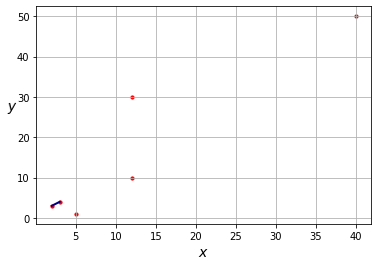

In [264]:
import matplotlib.pyplot as plt
plt.plot([2,3],[3,4],linewidth = 2,color='navy')
plt.scatter(x=[2,12,40,5,12,3],y=[3,30,50,1,10,4],s=10,color='red')
plt.xlabel('$x$',fontsize = 14)
plt.ylabel('$y$',rotation = True,fontsize = 14)
plt.grid()

### Longest Common Prefix

**Problem**: Given a set of strings, find the longest common prefix.

In [7]:
def LCP(lst,low,high):
    if low == high:
        return lst[low]
    
    if high > low:
        mid = (low + high) // 2
        
    str1 = LCP(lst, low, mid)  
    str2 = LCP(lst, mid + 1, high)  
    
    return LCP_Util(str1, str2) 

def LCP_Util(str1,str2):  
  
    res = ""  
    n1, n2 = len(str1), len(str2) 
    i, j = 0, 0
  
    while i <= n1 - 1 and j <= n2 - 1:  
      
        if str1[i] != str2[j]:  
            break
        res += str1[i] 
        i, j = i + 1, j + 1
      
    return res 
        

In [16]:
lst = ["flower", "flour","flow", "floor"]  
n = len(lst) 
print("Longest common prefix:",LCP(lst,0,n-1))

Longest common prefix: flo


### Maximum and minimum of an array using minimum number of comparisons

**Problem**: Find the maximum and minimum of an array using minimum number of comparisons.

In [65]:
def get_max_min(lst,low,high):
    if len(lst) == 0:
        return None
    
    if low == high:
        lst_max = lst[low]
        lst_min = lst[low]
        return lst_max,lst_min
         
    elif high == low + 1:
        if lst[low] > lst[high]:
            lst_max = lst[low]
            lst_min = lst[high]
        else:
            lst_max = lst[high]
            lst_min = lst[low]
        return lst_max,lst_min
    else:
        mid = (low + high) // 2
        lst_max1, lst_min1 = get_max_min(lst,low,mid)
        lst_max2, lst_min2 = get_max_min(lst,mid+1,high)
 
    return max(lst_max1,lst_max2), min(lst_min1,lst_min2)

In [66]:
lst = [1001, 15, 455, 1, 360, 3124214]
high = len(lst) - 1
low = 0
lst_max,lst_min = get_max_min(lst,low,high)
print('Maximum:',lst_max)
print('Minimum:',lst_min)

Maximum: 3124214
Minimum: 1


### Convex-Hull Problem

**Problem**: A convex hull is the smallest convex polygon containing all the given points.

Input is an array of points specified by their $x$ and $y$ coordinates. The output is the convex hull of this set of points.

In [251]:
class Point(): 
    def __init__(self,x,y): 
        self.x = x 
        self.y = y 
        
def line_dist(p_min,p_max,p):
    S = abs((p_min.x*p_max.y + p_max.x*p.y + p.x*p_min.y - p_min.x*p.y - p_max.x*p_min.y - p.x*p_max.y) / 2)
    dist_max_min = math.sqrt((p_min.x-p_max.x)**2 + (p_min.y-p_max.y)**2)
    dist = (S*2)/dist_max_min
    return dist

def get_side(p_min,p_max,p):        
    k = (p_max.y - p_min.y) / (p_max.x - p_min.x)
    b = p_max.y - (k * p_max.x)
    temp = k * p.x + b 
    if p.y > temp:
        return 1
    elif p.y == temp:
        return 0
    else:
        return -1

def quick_hull(lst):
    n = len(lst)
    if n < 3:
        print('Convex hull not possible')
        return

    lst.sort(key = lambda point: point.x)
    lst_l = [p for p in lst if get_side(lst[0],lst[-1],p) == 1]
    lst_r = [p for p in lst if get_side(lst[0],lst[-1],p) == -1]
    
    l = _quick_hull(lst_l,lst[0],lst[-1],1)
    r = _quick_hull(lst_r,lst[0],lst[-1],-1)
    
    return [lst[0]]+l+r+[lst[-1]]
    
def _quick_hull(lst_p,lst_min,lst_max,side):
    max_dist = 0
    idx = -1
    for i in range(len(lst_p)):
        l_dist = line_dist(lst_min,lst_max,lst_p[i])
        if l_dist > max_dist:
            max_dist = l_dist
            idx = i
    if idx == -1:
        return
    if side == 1:
        lst_l = [p for p in lst_p if get_side(lst_min,lst_p[idx],p) == 1]
        lst_r = [p for p in lst_p if get_side(lst_p[idx],lst_max,p) == 1]
        p_l = _quick_hull(lst_l,lst_min,lst_p[idx],1)
        p_r = _quick_hull(lst_r,lst_p[idx],lst_max,1)
        res = []
        if p_l is not None:
            for i in p_l:
                res.append(i)
        res.append(lst_p[idx])
        if p_r is not None:
            for i in p_r:
                res.append(i)   
        return res
    else:
        lst_l = [p for p in lst_p if get_side(lst_min,lst_p[idx],p) == -1]
        lst_r = [p for p in lst_p if get_side(lst_p[idx],lst_max,p) == -1]
        p_l = _quick_hull(lst_l,lst_min,lst_p[idx],-1)
        p_r = _quick_hull(lst_r,lst_p[idx],lst_max,-1)
        res = []
        if p_l is not None:
            for i in p_l:
                res.append(i)
        res.append(lst_p[idx])
        if p_r is not None:
            for i in p_r:
                res.append(i)   
        return res
    

In [252]:
P = [Point(1,3),Point(2,0),Point(3,4),Point(1,1),Point(2,2),Point(4,4),Point(0,1),Point(1,2),
    Point(3,1),Point(3,3),Point(2,1),Point(3,2),Point(1,0)]
res = quick_hull(P)
print('Solution:',end=' ')
for p in res:
    print('(',p.x,',',p.y,')',end=' ')

Solution: ( 0 , 1 ) ( 1 , 3 ) ( 3 , 4 ) ( 1 , 0 ) ( 2 , 0 ) ( 3 , 1 ) ( 4 , 4 ) 

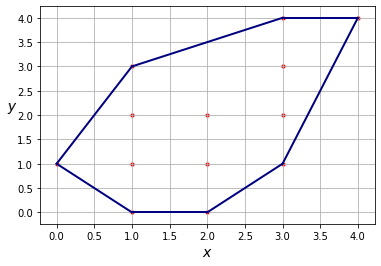

In [263]:
import matplotlib.pyplot as plt
plt.plot([0,1],[1,0],linewidth = 2,color='navy')
plt.plot([0,1],[1,3],linewidth = 2,color='navy')
plt.plot([1,3],[3,4],linewidth = 2,color='navy')
plt.plot([1,2],[0,0],linewidth = 2,color='navy')
plt.plot([2,3],[0,1],linewidth = 2,color='navy')
plt.plot([3,4],[4,4],linewidth = 2,color='navy')
plt.plot([3,4],[1,4],linewidth = 2,color='navy')
plt.scatter(x=[1,2,3,1,2,4,0,1,3,3,2,3,1],y=[3,0,4,1,2,4,1,2,1,3,1,2,0],s=10,color='red')
plt.xlabel('$x$',fontsize = 14)
plt.ylabel('$y$',rotation = True,fontsize = 14)
plt.grid()

## Dynamic Programming

### 0-1 Knapsack Problem

**Problem**: Given weights and values of $n$ items, put these items in a knapsack of capacity $W$ to get the maximum total value in the knapsack.

You cannot break an item, either pick the complete item or don’t pick it (0-1 property).

In [8]:
def knapsack_0_1(capacity, wt, val):
    n = len(val)
    K = [[0 for x in range(capacity + 1)] for x in range(n + 1)] 
  
    for i in range(n + 1): 
        for w in range(capacity + 1): 
            if i == 0 or w == 0: 
                K[i][w] = 0
            elif wt[i-1] <= w: 
                K[i][w] = max(val[i-1]+K[i-1][w-wt[i-1]],K[i-1][w]) 
            else: 
                K[i][w] = K[i-1][w] 
  
    return K[n][capacity] 
  

In [10]:
value = [60, 100, 120] 
weight = [10, 20, 30] 
capacity = 50
print('Maximum value to obtain:',knapsack_0_1(capacity, weight, value))

Maximum value to obtain: 220


### Longest Common Substring

**Problem**:  Given two sequences, find the length of longest substring (consecutive) present in both of them. 


In [66]:
def LCS(S1, S2):
    n = len(S1)
    m = len(S2)
    K = [[0 for x in range(m + 1)] for x in range(n + 1)] 
    
    res = 0
    for i in range(n+1):
        for j in range(m+1):
            if i == 0 or j == 0:
                K[i][j] = 0
            elif S1[i-1] == S2[j-1]:
                K[i][j] = K[i-1][j-1] + 1
            
            if res < K[i][j]:
                res = K[i][j]
                
    return res

In [67]:
S1 = "AGGTAB"
S2 = "BGGTCACAB"
print("Length of longest common substring:",LCS(S1, S2))

Length of longest common substring: 3


### Longest Common Subsequence

**Problem**:  Given two sequences, find the length of longest subsequence present in both of them. 

A subsequence is a sequence that appears in the same relative order, but not necessarily contiguous. 

For example, “abc”, “abg”, “bdf”, “aeg”, ‘”acefg”, .. etc are subsequences of “abcdefg”.

In [68]:
def LCS(S1, S2):
    n = len(S1)
    m = len(S2)
    K = [[0 for x in range(m + 1)] for x in range(n + 1)] 
    
    for i in range(n+1):
        for j in range(m+1):
            if i == 0 or j == 0:
                K[i][j] = 0
            elif S1[i-1] == S2[j-1]:
                K[i][j] = K[i-1][j-1] + 1
            else:
                K[i][j] = max(K[i][j-1],K[i-1][j])
    
    return K[n][m]

In [69]:
S1 = "AGGTAB"
S2 = "GXTXAYB"
print("Length of longest common subsequence:",LCS(S1, S2))

Length of longest common subsequence: 4


### Coin-Row Problem

**Problem**: There is a row of $n$ coins whose values are some positive integers $c1$, $c2$, ..., $cn$, not necessarily distinct. 

The goal is to pick up the maximum amount of money subject to the constraint that no two coins adjacent in the initial row can be picked up.

In [4]:
def cow_row(coins):
    N = len(coins)
    res = [0] * (N + 1)
    res[1]  =coins[0]
    
    for i in range(2,len(res)):
        res[i] = max(res[i-2]+coins[i-1],res[i-1])
    
    return res[-1]

In [6]:
coins = [5,1,2,10,6,2]
print('Maximum amount of money:',cow_row(coins))

Maximum amount of money: 17


### Coin-Collecting Problem

**Problem**: Several coins are placed in cells of an $N × M$ board, no more than one coin per cell. 

A robot, located in the upper left cell of the board, needs to collect as many of the coins as possible and bring them to the bottom right cell. 

On each step, the robot can move either one cell to the right or one cell down from its current location. When the robot visits a cell with a coin, it always picks up that coin. 

Find the maximum number of coins the robot can collect.

In [18]:
def robot_coin_collecting(B):
    N  = len(B)
    M = len(B[0])
    T = [[0 for j in range(M)] for i in range(N)]
    if B[0][0] == 1:
        T[0][0] = 1
    for i in range(1,M):
        T[0][i] = T[0][i-1] + B[0][i]  
    for i in range(1,N):
        T[i][0] = T[i-1][0] + B[i][0]
        
    for i in range(1,N):
        for j in range(1,M):
            T[i][j] = max(T[i-1][j]+B[i][j],T[i][j-1]+B[i][j])
    
    return T[N-1][M-1]

In [19]:
board = [[0,0,0,0,1,0],
         [0,1,0,1,0,0],
         [0,0,0,1,0,1],
         [0,0,1,0,0,1],
         [1,0,0,0,1,0]]
print('Maximum number of coins to collect:',robot_coin_collecting(board))

Maximum number of coins to collect: 5
